<a href="https://colab.research.google.com/github/hemanthreddy-1711/Data-Mining-Project-Unstoppable/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Supercharge Locations.csv',encoding='cp1252')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Display the first few rows
data.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014


In [ ]:
# Dataset structure
data.info()

# Summary statistics for numerical columns
data.describe()

# Summary statistics for categorical columns
data.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Supercharger    5876 non-null   object 
 1   Street Address  5876 non-null   object 
 2   City            5876 non-null   object 
 3   State           5754 non-null   object 
 4   Zip             3947 non-null   object 
 5   Country         5876 non-null   object 
 6   Stalls          5876 non-null   int64  
 7   kW              5870 non-null   float64
 8   GPS             5876 non-null   object 
 9   Elev(m)         5876 non-null   int64  
 10  Open Date       5126 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 505.1+ KB


,Supercharger,Street Address,City,State,Zip,Country,GPS,Open Date
count,5876,5876,5876,5754,3947,5876,5876,5126
unique,5876,5856,3452,427,3518,48,5874,1785
top,"Buellton, CA","Località Autoporto, 33B",Shanghai,CA,94403,USA,"29.79678431, 119.71462154",1/22/2021
freq,1,3,181,496,5,2264,2,459


In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

,0
State,122
Zip,1929
kW,6
Open Date,750


In [ ]:
# adding data to missing values
data['kW'] = data['kW'].fillna(data['kW'].mean())


data['State'] = data['State'].fillna(data['State'].mode()[0])
data['Zip'] = data['Zip'].fillna(data['Zip'].mode()[0])


data['Open Date'] = pd.to_datetime(data['Open Date'], errors='coerce')


data['Open Date'] = data['Open Date'].fillna(data['Open Date'].mode()[0])


# Check for missing values
missing_data = data.isnull().sum()

# Filter out columns with missing values
missing_data = missing_data[missing_data > 0]

if missing_data.empty:
    print("No missing values in the dataset.")
else:
    print("Missing values detected:")
    print(missing_data)

No missing values in the dataset.


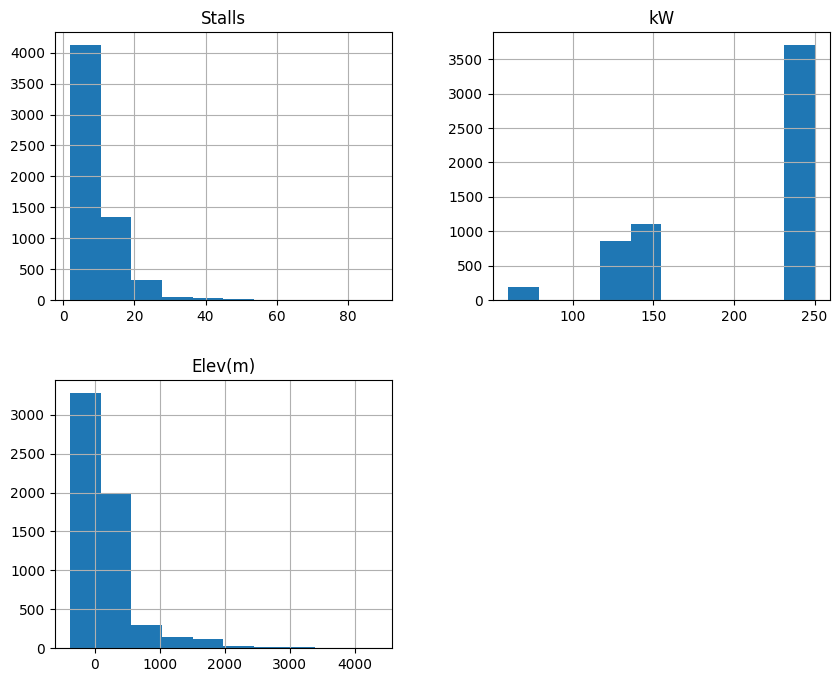

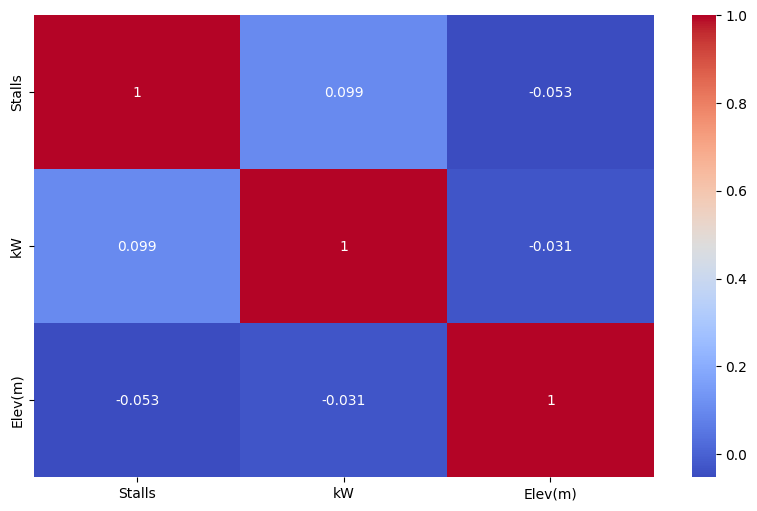

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Select only numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)

# Histogram for numerical columns
numerical_data.hist(figsize=(10, 8))
plt.show()

# Correlation Heatmap for numerical features only
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

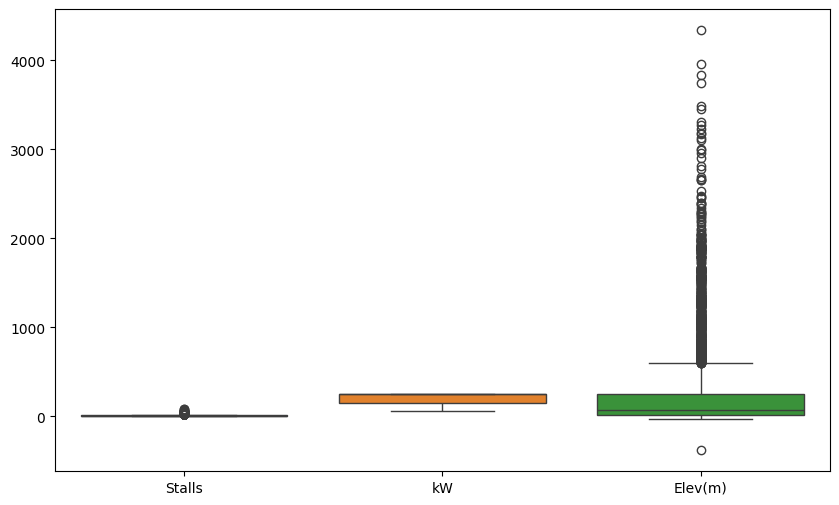

In [ ]:
# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()


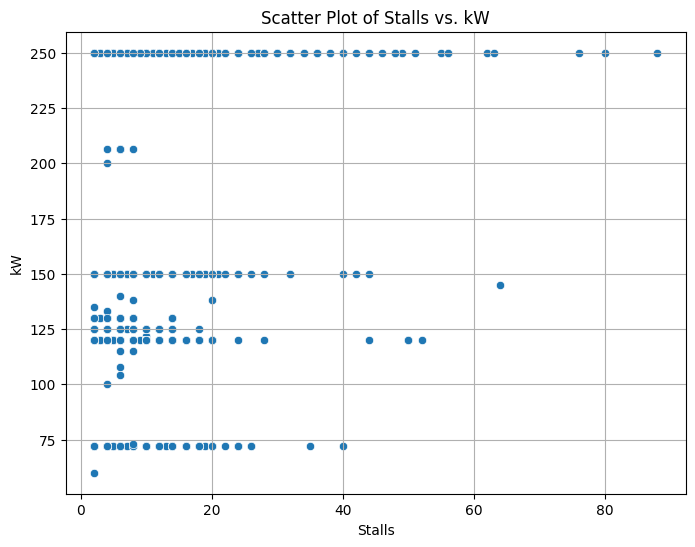

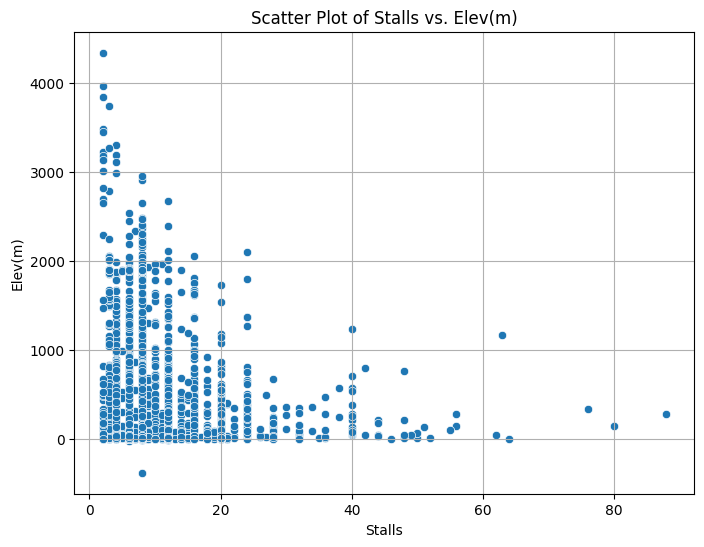

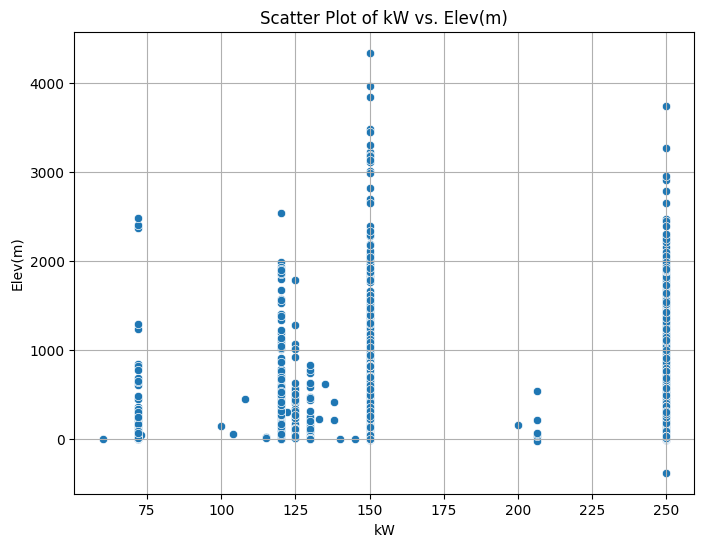

In [ ]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

# Create scatter plots for all pairs of numerical features
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]

        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.scatterplot(data=data, x=col1, y=col2)
        plt.title(f'Scatter Plot of {col1} vs. {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()

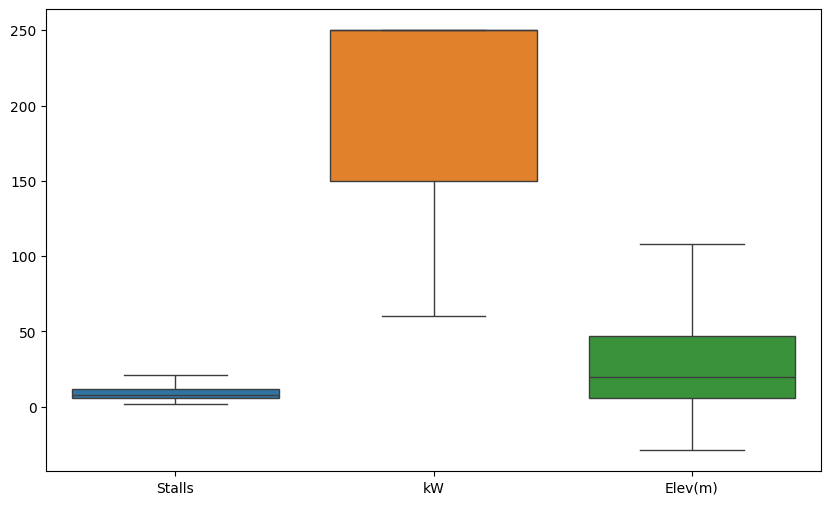

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cols_to_check = ['Stalls','kW','Elev(m)']

# Create a copy of the original DataFrame to avoid modifying it directly
data_filtered = data.copy()

for i in range(25):
  for col in cols_to_check:
      # Calculate quartiles (IQR)
      q1 = data_filtered[col].quantile(0.25)
      q3 = data_filtered[col].quantile(0.75)
      iqr = q3 - q1

      # Create a threshold for outlier detection (1.5 times IQR)
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      # Filter outliers based on thresholds
      data_filtered = data_filtered[(data_filtered[col] >= lower_bound) & (data_filtered[col] <= upper_bound)]


plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtered) # Use data_filtered for plotting
plt.show()

In [ ]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_filtered, drop_first=True)

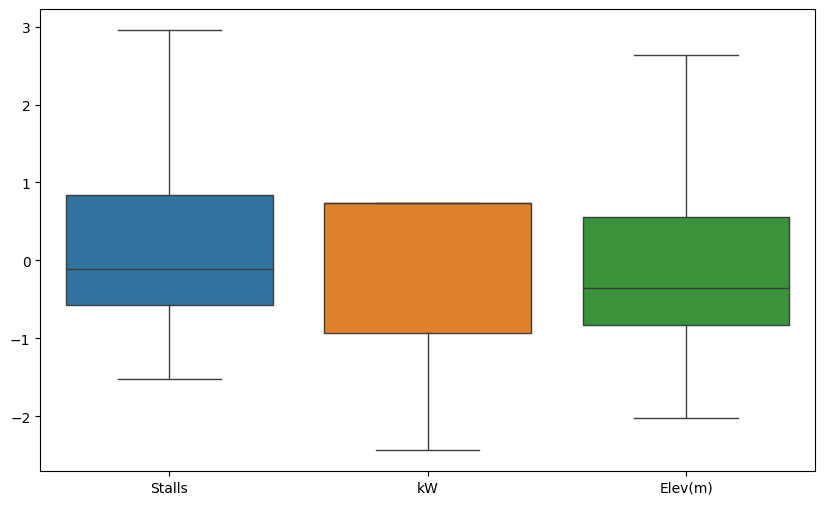

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
numerical_columns = data_filtered.select_dtypes(include=['float64', 'int64']).columns
data_filtered[numerical_columns] = scaler.fit_transform(data_filtered[numerical_columns])
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtered) # Use data_filtered for plotting
plt.show()

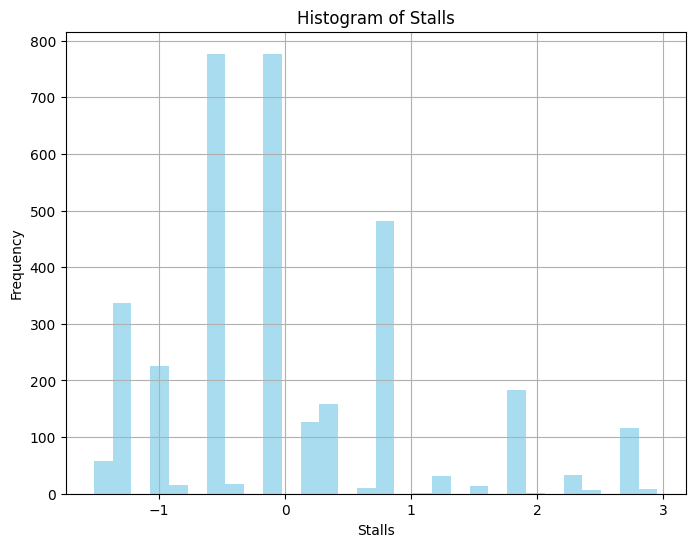

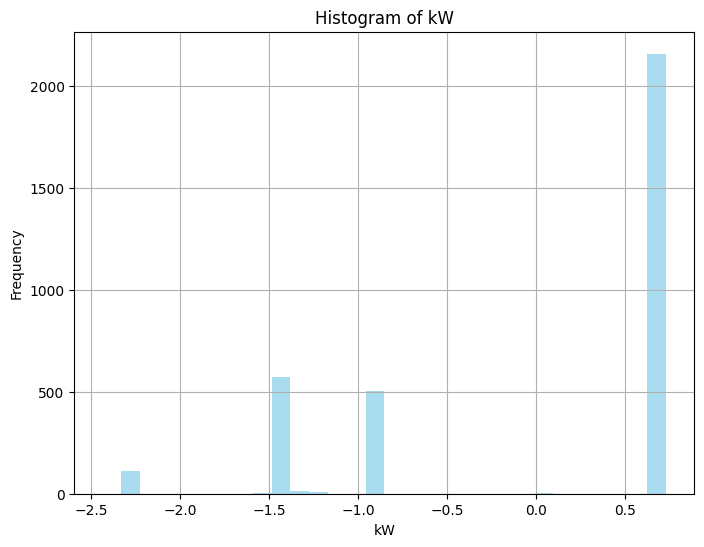

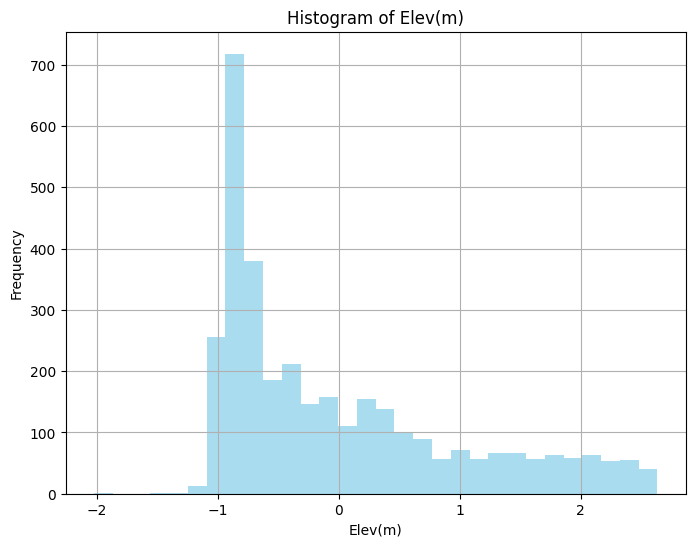

In [ ]:
# Select only numerical columns
numerical_columns = data_filtered.select_dtypes(include=np.number).columns.tolist()

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data_filtered[column], bins=30, color='skyblue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show() # Display each histogram separately

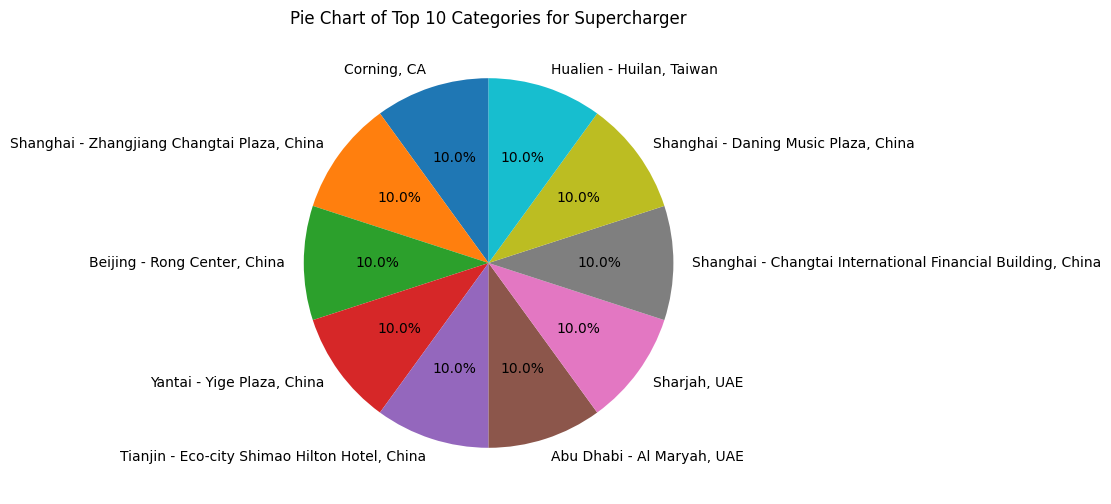

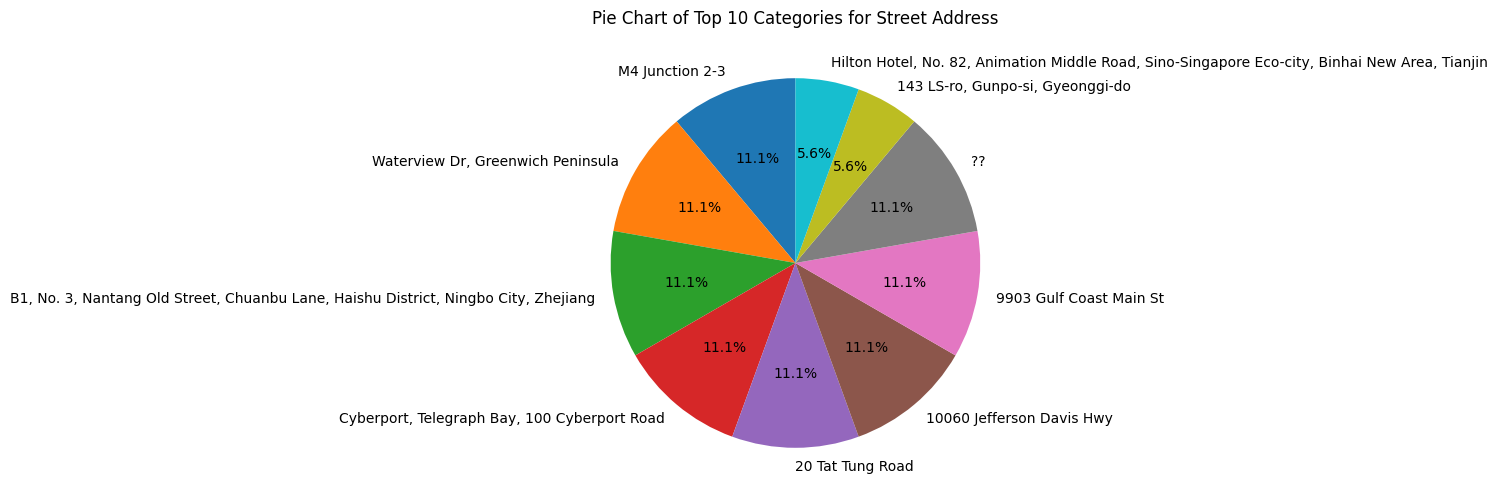

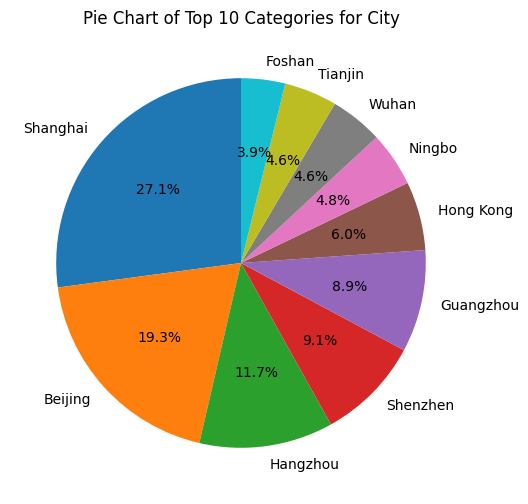

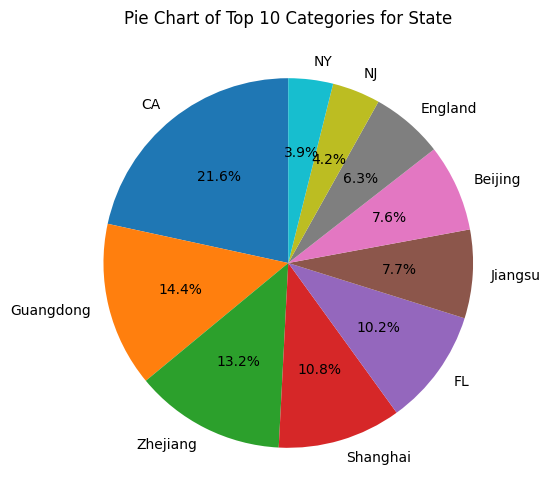

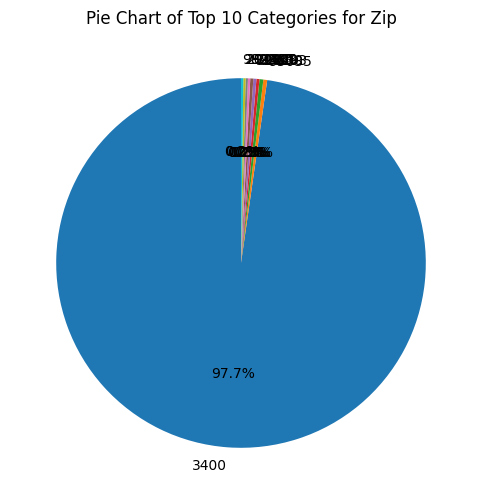

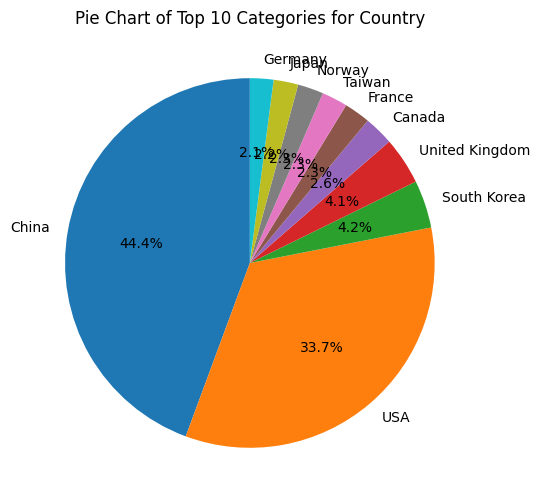

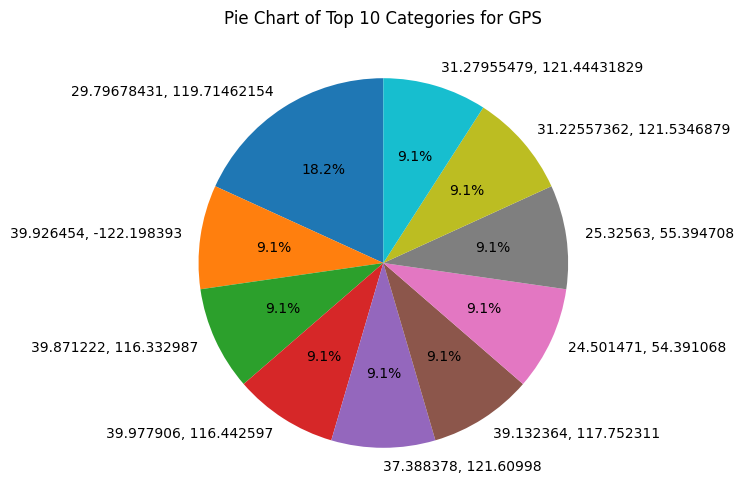

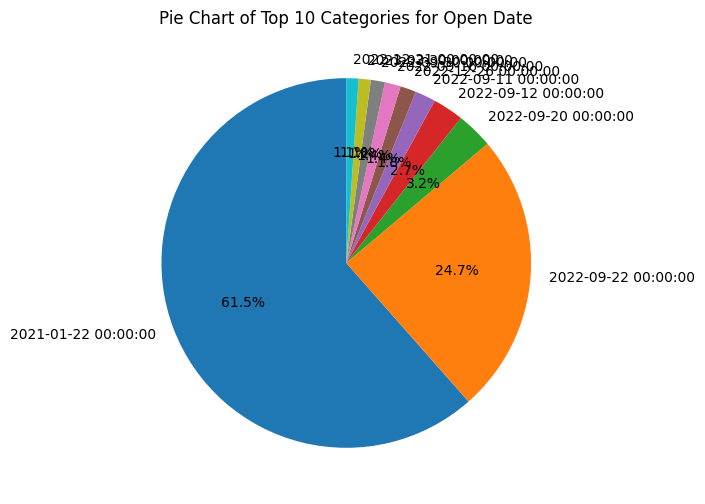

In [ ]:
categorical_columns = data_filtered.select_dtypes(exclude=np.number).columns.tolist()
for column in categorical_columns:
  plt.figure(figsize=(8, 6))
  state_counts = data_filtered[column].value_counts()

  top_n = 10
  state_counts = state_counts.nlargest(top_n)

  plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Pie Chart of Top {top_n} Categories for {column}')
  plt.show()

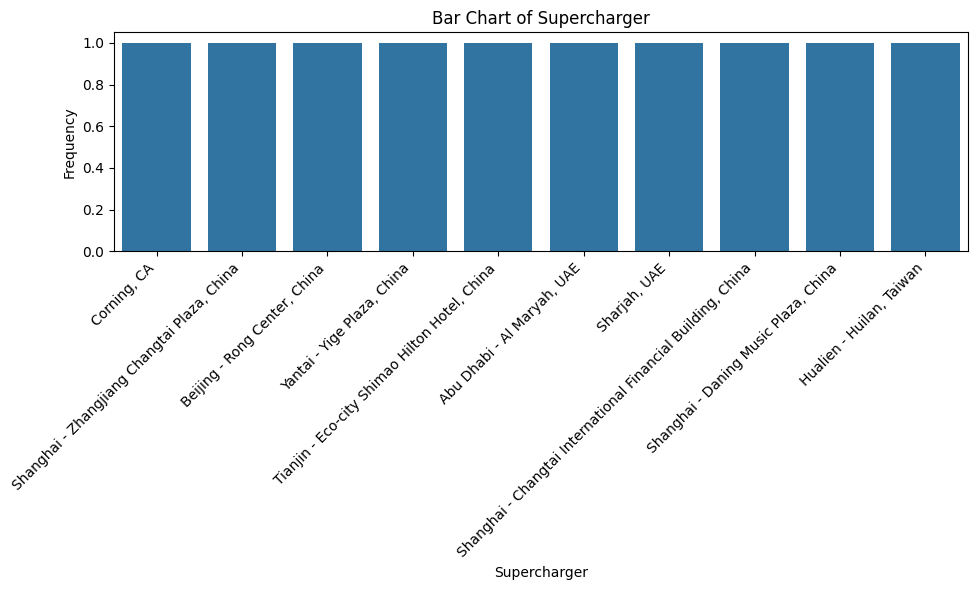

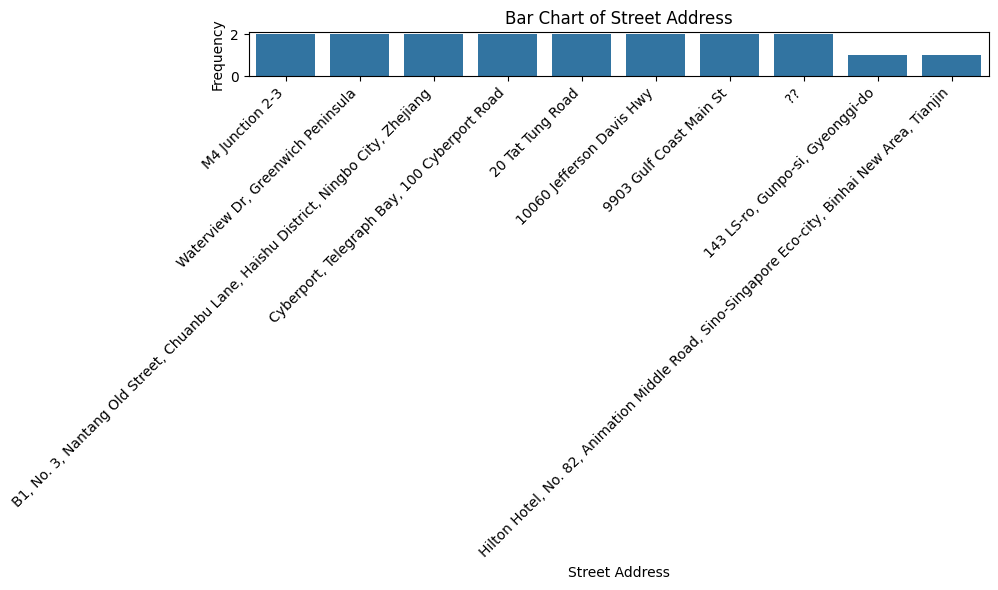

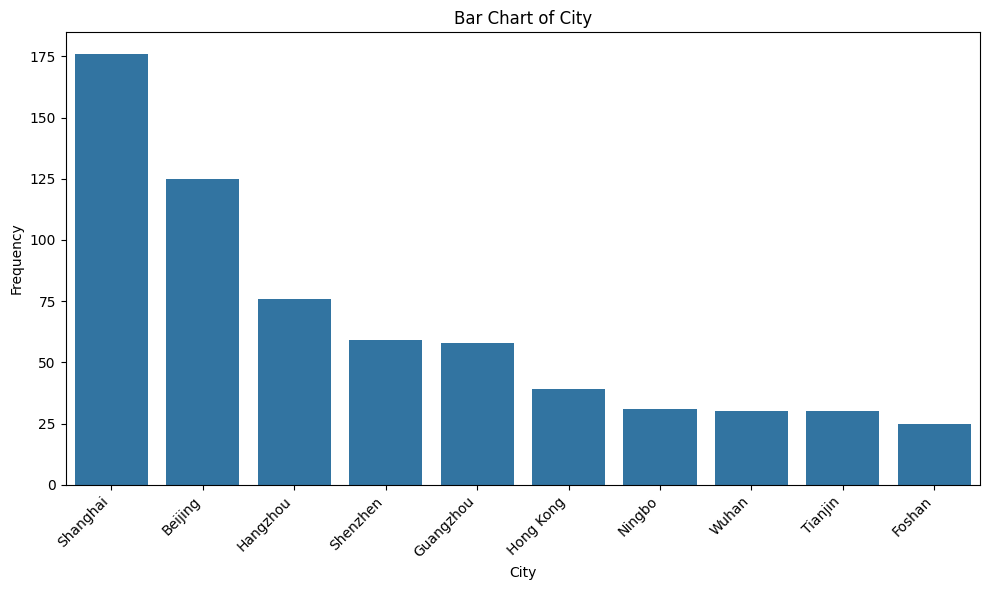

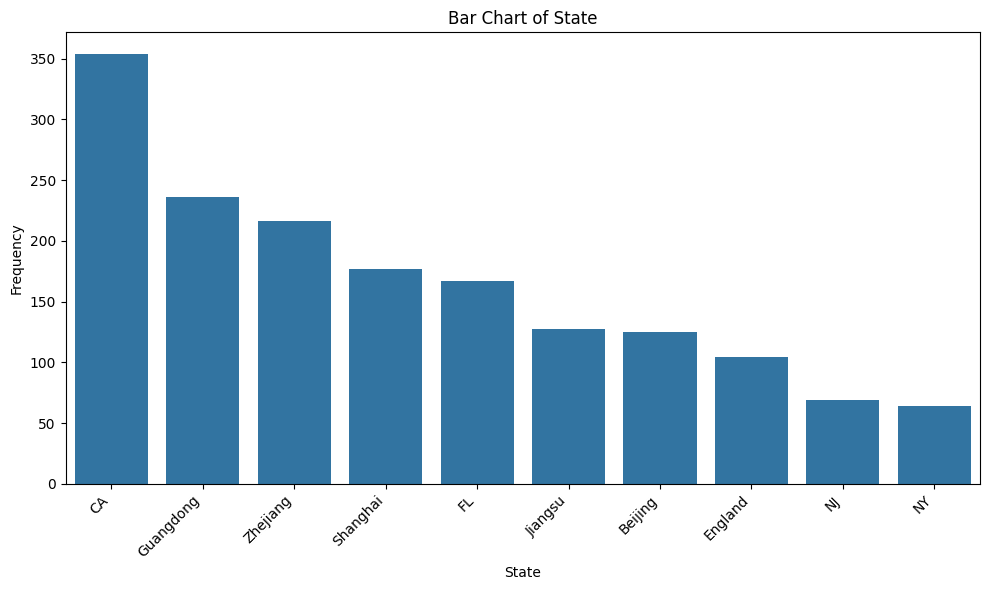

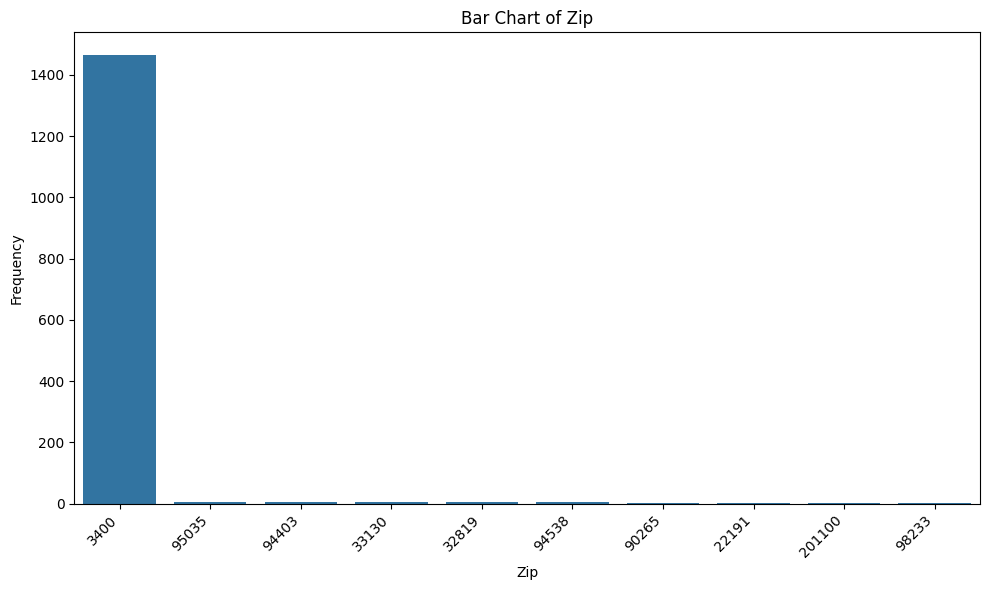

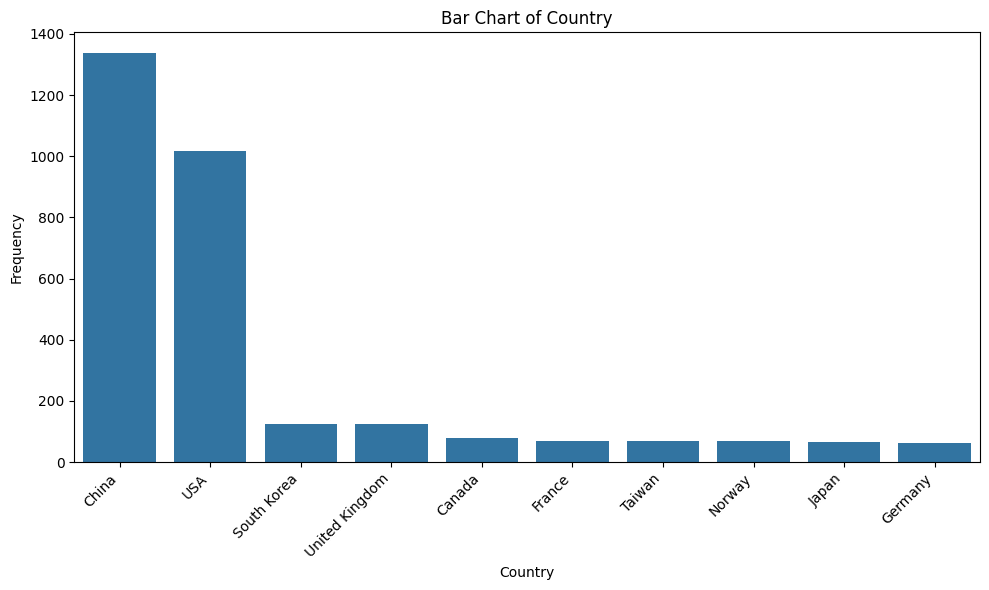

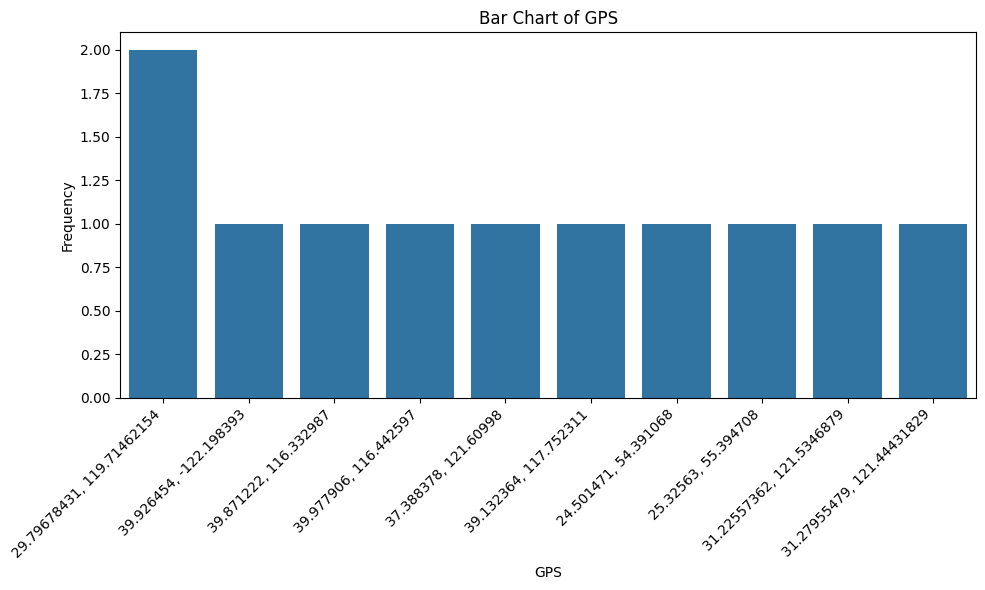

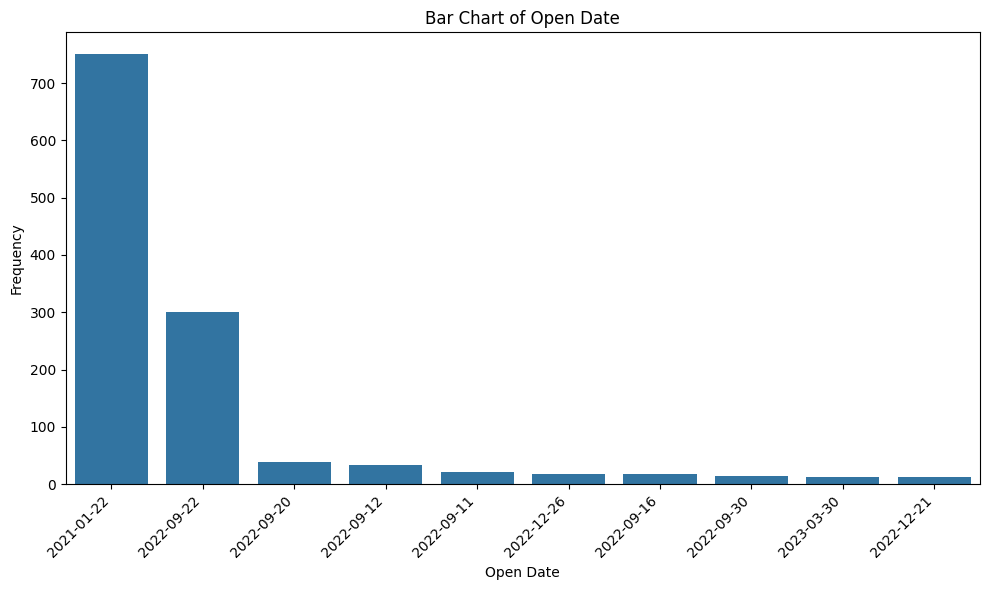

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Get value counts and limit to top categories (optional)
    value_counts = data_filtered[column].value_counts()
    top_n = 10  # You can adjust this or remove the limiting logic
    value_counts = value_counts.nlargest(top_n)

    # Create the bar plot using seaborn
    sns.countplot(data=data_filtered, x=column, order=value_counts.index)

    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

Data Modoling

Data Modling

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Supercharge Locations.csv',encoding='cp1252')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Display the first few rows
df.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014


Linear Regression MSE: 123048.5764716973
K-Means Clusters: [1 1 0 ... 2 0 1]
Random Forest MSE: 2779.9893331259714


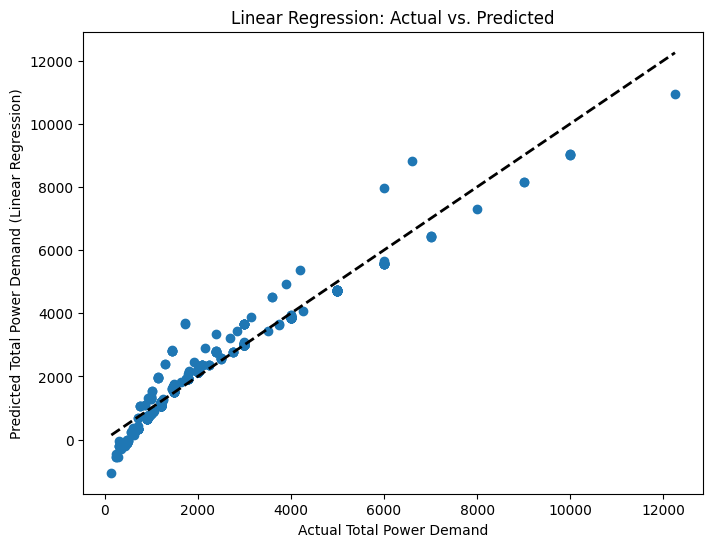

R-squared: 0.9472913666771485
Mean Squared Error (MSE): 123048.5764716973
Root Mean Squared Error (RMSE): 350.7828052680138
Mean Absolute Error (MAE): 223.92044441822205
Cross-Validation MSE Scores: [1.24852041e-21 4.22006666e-22 3.22635989e-22 1.22979711e-21
 1.35690985e-21]
Average Cross-Validation MSE: 9.159740050539979e-22


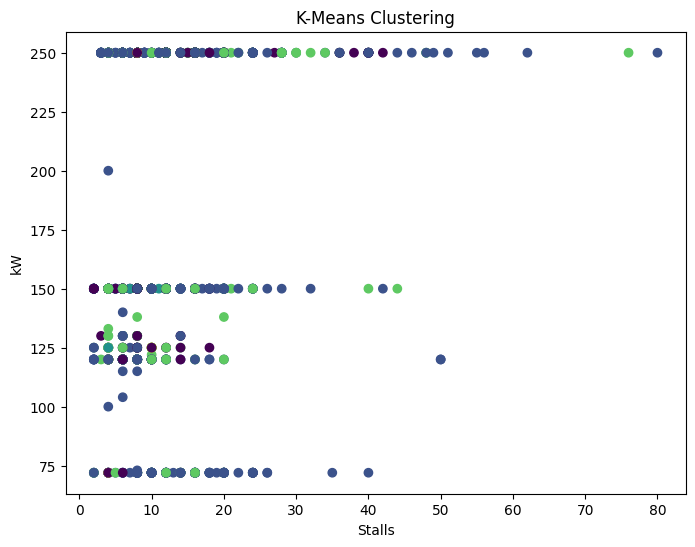

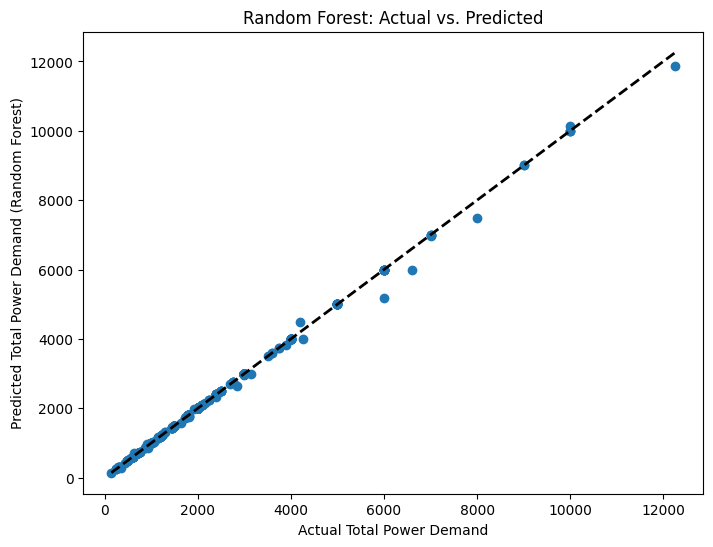

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the data is in a pandas DataFrame named 'df'

# Step 1: Data Preprocessing
df = df.dropna()  # Handling missing values
df['TotalPowerDemand'] = df['Stalls'] * df['kW']  # Creating a proxy for power demand

# Step 2: Model Selection and Training
X = df[['Stalls', 'kW', 'Elev(m)']]
y = df['TotalPowerDemand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {lr_mse}")

# K-Means Clustering
kmeans = KMeans(n_clusters=5)  # Assuming 5 clusters
kmeans.fit(X)
kmeans_labels = kmeans.labels_
print(f"K-Means Clusters: {kmeans_labels}")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}")


# --- Plotting ---

# Linear Regression Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Total Power Demand")
plt.ylabel("Predicted Total Power Demand (Linear Regression)")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()


# --- Performance Metrics ---

# R-squared
r2 = r2_score(y_test, y_pred_lr)
print(f"R-squared: {r2}")

# MSE
mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# MAE
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae}")

# --- Cross-Validation ---
# Using 5-fold cross-validation for MSE
cv_scores = cross_val_score(lr_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
# Note: cross_val_score returns negative MSE, so we need to negate it
cv_mse_scores = -cv_scores
print(f"Cross-Validation MSE Scores: {cv_mse_scores}")
print(f"Average Cross-Validation MSE: {np.mean(cv_mse_scores)}")

# K-Means Clustering Plot
plt.figure(figsize=(8, 6))
# Assuming 'Stalls' and 'kW' are the most relevant features for visualization
plt.scatter(X['Stalls'], X['kW'], c=kmeans_labels, cmap='viridis')
plt.xlabel("Stalls")
plt.ylabel("kW")
plt.title("K-Means Clustering")
plt.show()

# Random Forest Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Total Power Demand")
plt.ylabel("Predicted Total Power Demand (Random Forest)")
plt.title("Random Forest: Actual vs. Predicted")
plt.show()

Linear Regression MSE: 4.617979095090197e-21


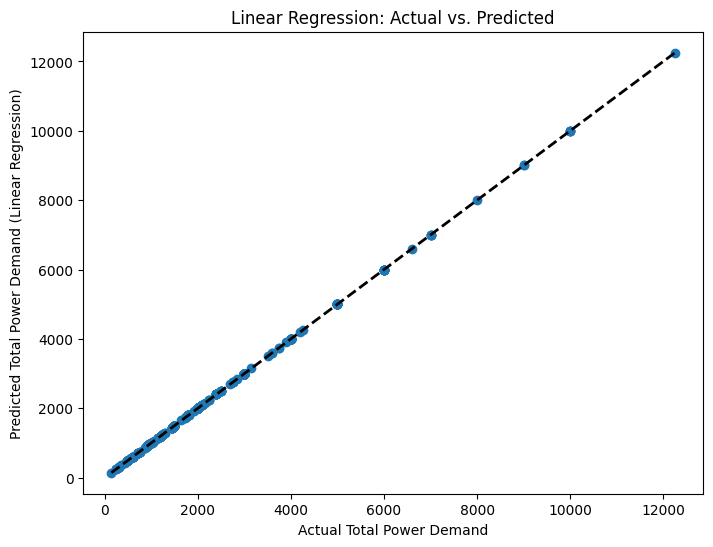

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the data is in a pandas DataFrame named 'df'

# Step 1: Data Preprocessing
df = df.dropna()  # Handling missing values
df['TotalPowerDemand'] = df['Stalls'] * df['kW']  # Creating a proxy for power demand

# Feature Engineering (example: interaction term)
df['Stalls_x_kW'] = df['Stalls'] * df['kW']

# Step 2: Model Selection and Training
# Include engineered feature and potentially polynomial features
X = df[['Stalls', 'kW', 'Elev(m)', 'Stalls_x_kW']]
y = df['TotalPowerDemand']

# Polynomial Features (optional - experiment with degree)
poly = PolynomialFeatures(degree=2)  # Try different degrees
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Linear Regression (with potential regularization)
lr_model = LinearRegression()  # Or use Ridge(alpha=...) or Lasso(alpha=...)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {lr_mse}")

# ... (Rest of the code for K-Means and Random Forest remains the same) ...

# --- Plotting ---
# ... (Plotting code remains the same) ...
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Total Power Demand")
plt.ylabel("Predicted Total Power Demand (Linear Regression)")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

In [ ]:
!pip install tensorflow

import tensorflow as tf


# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE): {mae}")

# ... (rest of your code)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6615429.0000 - mae: 2075.3696 - val_loss: 5762081.5000 - val_mae: 1769.0975
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5296704.5000 - mae: 1669.9000 - val_loss: 3876491.5000 - val_mae: 1263.6216
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2891128.5000 - mae: 1106.9628 - val_loss: 2294054.5000 - val_mae: 878.2385
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1803310.8750 - mae: 840.0054 - val_loss: 2033397.0000 - val_mae: 860.5067
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1822041.8750 - mae: 853.5538 - val_loss: 2017396.3750 - val_mae: 852.7813
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1670919.3750 - mae: 816.7633 - val_loss: 1978105.6250 - val_mae: 850.7935
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1690549.7500 - mae: 817.0400 - val_loss: 1926713.7500 - val_mae: 855.4521
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1610339.1250 - ma